In [51]:
#importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [52]:
#reading data from city_day.csv taken from kaggle from 01-01-2015 to 31-12-2024 of various Indian Cities
df = pd.read_csv("India_Cities_AQI_Weather_2015_2024_Combined.csv")

In [53]:
df.head()

,Date,City,State,AQI,AQI_Category,PM2.5,PM10,NO2,SO2,CO,...,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Wind_Direction,Atmospheric_Pressure_hPa,Visibility_km,Month,Season
0,2015-01-01,Delhi,Delhi,282,Poor,121,180,86,63,5.75,...,-6.0,-1.5,76.4,0.0,11.1,N,1010.55,14.9,1,Winter
1,2015-01-02,Delhi,Delhi,210,Poor,85,139,59,45,4.10,...,-8.8,-3.1,48.9,0.0,9.2,S,1015.14,14.5,1,Winter
2,2015-01-03,Delhi,Delhi,257,Poor,107,168,72,59,5.54,...,-4.5,-0.3,53.7,0.0,7.1,NE,1017.66,14.2,1,Winter
3,2015-01-04,Delhi,Delhi,193,Moderate,88,126,48,36,3.58,...,-7.3,-0.6,76.7,0.0,10.4,NW,1009.99,15.0,1,Winter
4,2015-01-05,Delhi,Delhi,274,Poor,124,145,83,53,4.85,...,-3.1,4.4,66.1,0.0,12.8,NE,1016.24,15.0,1,Winter


### Analysing data 

#### Understanding the Data and handling missing values

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      18265 non-null  object 
 1   City                      18265 non-null  object 
 2   State                     18265 non-null  object 
 3   AQI                       18265 non-null  int64  
 4   AQI_Category              18265 non-null  object 
 5   PM2.5                     18265 non-null  int64  
 6   PM10                      18265 non-null  int64  
 7   NO2                       18265 non-null  int64  
 8   SO2                       18265 non-null  int64  
 9   CO                        18265 non-null  float64
 10  O3                        18265 non-null  int64  
 11  NH3                       18265 non-null  int64  
 12  Max_Temperature_C         18265 non-null  float64
 13  Min_Temperature_C         18265 non-null  float64
 14  Avg_Te

In [55]:
df.shape

(18265, 23)

In [56]:
#checking null values
df.isnull().sum()

Date                        0
City                        0
State                       0
AQI                         0
AQI_Category                0
PM2.5                       0
PM10                        0
NO2                         0
SO2                         0
CO                          0
O3                          0
NH3                         0
Max_Temperature_C           0
Min_Temperature_C           0
Avg_Temperature_C           0
Humidity_Percent            0
Rainfall_mm                 0
Wind_Speed_kmh              0
Wind_Direction              0
Atmospheric_Pressure_hPa    0
Visibility_km               0
Month                       0
Season                      0
dtype: int64

In [57]:
df.columns

Index(['Date', 'City', 'State', 'AQI', 'AQI_Category', 'PM2.5', 'PM10', 'NO2',
       'SO2', 'CO', 'O3', 'NH3', 'Max_Temperature_C', 'Min_Temperature_C',
       'Avg_Temperature_C', 'Humidity_Percent', 'Rainfall_mm',
       'Wind_Speed_kmh', 'Wind_Direction', 'Atmospheric_Pressure_hPa',
       'Visibility_km', 'Month', 'Season'],
      dtype='object')

In [58]:
df.describe()

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,NH3,Max_Temperature_C,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Atmospheric_Pressure_hPa,Visibility_km,Month
count,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000
mean,117.620476,46.519244,70.035532,34.795292,22.990857,2.357313,40.670025,17.231371,25.974563,14.468119,20.221276,76.384216,1.266685,8.822502,1013.242090,9.774481,6.522310
std,50.482348,22.559589,33.684170,17.062194,11.242799,1.126961,21.112863,9.518506,9.786889,9.987360,9.836193,13.852881,5.116442,3.592870,10.039602,2.746346,3.448967
min,21.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,-3.700000,-17.800000,-10.800000,30.000000,0.000000,0.000000,962.360000,0.500000,1.000000
25%,81.000000,30.000000,46.000000,23.000000,15.000000,1.570000,26.000000,10.000000,18.800000,7.100000,13.000000,66.600000,0.000000,6.300000,1006.500000,7.900000,4.000000
50%,107.000000,43.000000,65.000000,33.000000,21.000000,2.200000,38.000000,16.000000,26.100000,14.700000,20.300000,76.700000,0.000000,8.800000,1013.210000,9.800000,7.000000
75%,143.000000,59.000000,89.000000,44.000000,29.000000,2.980000,53.000000,23.000000,33.500000,22.100000,27.800000,86.700000,0.000000,11.200000,1020.090000,11.800000,10.000000
max,371.000000,167.000000,242.000000,118.000000,77.000000,8.960000,142.000000,65.000000,52.100000,43.100000,47.600000,100.000000,134.400000,23.200000,1055.000000,15.000000,12.000000


In [59]:
print(df["City"].value_counts())

City
Delhi        3653
Chennai      3653
Kolkata      3653
Mumbai       3653
Bengaluru    3653
Name: count, dtype: int64


#### Observation

This dataset contains daily amount of pollutant present in air in top 5 cities of India - Delhi, Mumbai, Chennai, Kolkata, and Banglore.
The dataset has 18265 rows and 16 columns out of which three columns are categorical (City, Date, AQI_Bucket) rest are numerical amount of each pollutant present in air. 

In [60]:
#converting date column into datetime object
df["Date"]=pd.to_datetime(df["Date"])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      18265 non-null  datetime64[ns]
 1   City                      18265 non-null  object        
 2   State                     18265 non-null  object        
 3   AQI                       18265 non-null  int64         
 4   AQI_Category              18265 non-null  object        
 5   PM2.5                     18265 non-null  int64         
 6   PM10                      18265 non-null  int64         
 7   NO2                       18265 non-null  int64         
 8   SO2                       18265 non-null  int64         
 9   CO                        18265 non-null  float64       
 10  O3                        18265 non-null  int64         
 11  NH3                       18265 non-null  int64         
 12  Max_Temperature_C 

In [62]:
#diving group based on city names
group_df = df.groupby("City")

#making city wise dataframe
delhi_df = group_df.get_group("Delhi")
bangalore_df = group_df.get_group("Bengaluru")
kolkata_df = group_df.get_group("Kolkata")
chennai_df = group_df.get_group("Chennai")
mumbai_df = group_df.get_group("Mumbai")

In [63]:
delhi_df

,Date,City,State,AQI,AQI_Category,PM2.5,PM10,NO2,SO2,CO,...,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Wind_Direction,Atmospheric_Pressure_hPa,Visibility_km,Month,Season
0,2015-01-01,Delhi,Delhi,282,Poor,121,180,86,63,5.75,...,-6.0,-1.5,76.4,0.0,11.1,N,1010.55,14.9,1,Winter
1,2015-01-02,Delhi,Delhi,210,Poor,85,139,59,45,4.10,...,-8.8,-3.1,48.9,0.0,9.2,S,1015.14,14.5,1,Winter
2,2015-01-03,Delhi,Delhi,257,Poor,107,168,72,59,5.54,...,-4.5,-0.3,53.7,0.0,7.1,NE,1017.66,14.2,1,Winter
3,2015-01-04,Delhi,Delhi,193,Moderate,88,126,48,36,3.58,...,-7.3,-0.6,76.7,0.0,10.4,NW,1009.99,15.0,1,Winter
4,2015-01-05,Delhi,Delhi,274,Poor,124,145,83,53,4.85,...,-3.1,4.4,66.1,0.0,12.8,NE,1016.24,15.0,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2024-12-27,Delhi,Delhi,249,Poor,99,155,78,46,4.08,...,-5.9,-1.0,58.5,0.0,7.0,NW,993.60,14.5,12,Winter
3649,2024-12-28,Delhi,Delhi,232,Poor,87,119,63,49,5.02,...,-6.7,-2.3,68.2,0.0,10.1,S,1033.39,14.3,12,Winter
3650,2024-12-29,Delhi,Delhi,198,Moderate,81,128,68,43,4.37,...,-10.2,-4.6,67.9,0.0,9.2,NE,1011.49,14.3,12,Winter
3651,2024-12-30,Delhi,Delhi,199,Moderate,88,129,48,41,3.76,...,-5.9,0.1,55.9,0.0,9.2,E,1011.07,14.1,12,Winter


In [64]:
#reseting indices
delhi_df = delhi_df.reset_index(drop=True)
mumbai_df = mumbai_df.reset_index(drop=True)
kolkata_df = kolkata_df.reset_index(drop=True)
chennai_df = chennai_df.reset_index(drop=True)
bangalore_df = bangalore_df.reset_index(drop=True)


In [65]:
delhi_df

,Date,City,State,AQI,AQI_Category,PM2.5,PM10,NO2,SO2,CO,...,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Wind_Direction,Atmospheric_Pressure_hPa,Visibility_km,Month,Season
0,2015-01-01,Delhi,Delhi,282,Poor,121,180,86,63,5.75,...,-6.0,-1.5,76.4,0.0,11.1,N,1010.55,14.9,1,Winter
1,2015-01-02,Delhi,Delhi,210,Poor,85,139,59,45,4.10,...,-8.8,-3.1,48.9,0.0,9.2,S,1015.14,14.5,1,Winter
2,2015-01-03,Delhi,Delhi,257,Poor,107,168,72,59,5.54,...,-4.5,-0.3,53.7,0.0,7.1,NE,1017.66,14.2,1,Winter
3,2015-01-04,Delhi,Delhi,193,Moderate,88,126,48,36,3.58,...,-7.3,-0.6,76.7,0.0,10.4,NW,1009.99,15.0,1,Winter
4,2015-01-05,Delhi,Delhi,274,Poor,124,145,83,53,4.85,...,-3.1,4.4,66.1,0.0,12.8,NE,1016.24,15.0,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2024-12-27,Delhi,Delhi,249,Poor,99,155,78,46,4.08,...,-5.9,-1.0,58.5,0.0,7.0,NW,993.60,14.5,12,Winter
3649,2024-12-28,Delhi,Delhi,232,Poor,87,119,63,49,5.02,...,-6.7,-2.3,68.2,0.0,10.1,S,1033.39,14.3,12,Winter
3650,2024-12-29,Delhi,Delhi,198,Moderate,81,128,68,43,4.37,...,-10.2,-4.6,67.9,0.0,9.2,NE,1011.49,14.3,12,Winter
3651,2024-12-30,Delhi,Delhi,199,Moderate,88,129,48,41,3.76,...,-5.9,0.1,55.9,0.0,9.2,E,1011.07,14.1,12,Winter


### City-wise forecasting using FB Prophet

#### 1. Delhi

In [66]:
delhi_df

,Date,City,State,AQI,AQI_Category,PM2.5,PM10,NO2,SO2,CO,...,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Wind_Direction,Atmospheric_Pressure_hPa,Visibility_km,Month,Season
0,2015-01-01,Delhi,Delhi,282,Poor,121,180,86,63,5.75,...,-6.0,-1.5,76.4,0.0,11.1,N,1010.55,14.9,1,Winter
1,2015-01-02,Delhi,Delhi,210,Poor,85,139,59,45,4.10,...,-8.8,-3.1,48.9,0.0,9.2,S,1015.14,14.5,1,Winter
2,2015-01-03,Delhi,Delhi,257,Poor,107,168,72,59,5.54,...,-4.5,-0.3,53.7,0.0,7.1,NE,1017.66,14.2,1,Winter
3,2015-01-04,Delhi,Delhi,193,Moderate,88,126,48,36,3.58,...,-7.3,-0.6,76.7,0.0,10.4,NW,1009.99,15.0,1,Winter
4,2015-01-05,Delhi,Delhi,274,Poor,124,145,83,53,4.85,...,-3.1,4.4,66.1,0.0,12.8,NE,1016.24,15.0,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2024-12-27,Delhi,Delhi,249,Poor,99,155,78,46,4.08,...,-5.9,-1.0,58.5,0.0,7.0,NW,993.60,14.5,12,Winter
3649,2024-12-28,Delhi,Delhi,232,Poor,87,119,63,49,5.02,...,-6.7,-2.3,68.2,0.0,10.1,S,1033.39,14.3,12,Winter
3650,2024-12-29,Delhi,Delhi,198,Moderate,81,128,68,43,4.37,...,-10.2,-4.6,67.9,0.0,9.2,NE,1011.49,14.3,12,Winter
3651,2024-12-30,Delhi,Delhi,199,Moderate,88,129,48,41,3.76,...,-5.9,0.1,55.9,0.0,9.2,E,1011.07,14.1,12,Winter


In [67]:
delhi_df.columns

Index(['Date', 'City', 'State', 'AQI', 'AQI_Category', 'PM2.5', 'PM10', 'NO2',
       'SO2', 'CO', 'O3', 'NH3', 'Max_Temperature_C', 'Min_Temperature_C',
       'Avg_Temperature_C', 'Humidity_Percent', 'Rainfall_mm',
       'Wind_Speed_kmh', 'Wind_Direction', 'Atmospheric_Pressure_hPa',
       'Visibility_km', 'Month', 'Season'],
      dtype='object')

In [68]:
delhi_df.index

RangeIndex(start=0, stop=3653, step=1)

In [69]:
#splitting each pollutant
#pm2.5
delhi_pm25 = pd.DataFrame(delhi_df[["Date", "PM2.5"]])
delhi_pm25.columns = ["ds", "y"]

#pm10
delhi_pm10 = pd.DataFrame(delhi_df[["Date", "PM10"]])
delhi_pm10.columns = ["ds", "y"]

#NO2
delhi_no2 = pd.DataFrame(delhi_df[["Date", "NO2"]])
delhi_no2.columns = ["ds", "y"]

#NH3
delhi_nh3 = pd.DataFrame(delhi_df[["Date", "NH3"]])
delhi_nh3.columns = ["ds", "y"]

#CO
delhi_co = pd.DataFrame(delhi_df[["Date", "CO"]])
delhi_co.columns = ["ds", "y"]

#SO2
delhi_so2 = pd.DataFrame(delhi_df[["Date", "SO2"]])
delhi_so2.columns = ["ds", "y"]

#O3
delhi_o3 = pd.DataFrame(delhi_df[["Date", "O3"]])
delhi_o3.columns = ["ds", "y"]


In [70]:
delhi_pm25['ds']

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
3648   2024-12-27
3649   2024-12-28
3650   2024-12-29
3651   2024-12-30
3652   2024-12-31
Name: ds, Length: 3653, dtype: datetime64[ns]

In [71]:
from prophet import Prophet

In [72]:
#initialize prophet for each pollutant
model_pm25 = Prophet()
model_pm25.fit(delhi_pm25)

#future timestamps
future_pm25 = model_pm25.make_future_dataframe(periods=365)

#predictions
forecast_pm25 = model_pm25.predict(future_pm25)

#print results
print(forecast_pm25[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:38:17 - cmdstanpy - INFO - Chain [1] start processing
11:38:17 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4013 2025-12-27  83.845718   60.953405  107.567736
4014 2025-12-28  84.047201   59.279444  107.900387
4015 2025-12-29  93.251496   70.564951  116.874212
4016 2025-12-30  92.930717   68.862039  114.700566
4017 2025-12-31  91.848317   69.245571  113.071006


In [73]:
model_pm10 = Prophet()
model_pm10.fit(delhi_pm10)

#future timestamps
future_pm10 = model_pm10.make_future_dataframe(periods=365)

#predictions
forecast_pm10 = model_pm10.predict(future_pm10)

#print results
print(forecast_pm10[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:38:19 - cmdstanpy - INFO - Chain [1] start processing
11:38:20 - cmdstanpy - INFO - Chain [1] done processing


             ds        yhat  yhat_lower  yhat_upper
4013 2025-12-27  125.617609   90.451578  161.172421
4014 2025-12-28  127.109775   95.544959  163.101530
4015 2025-12-29  138.765564  101.361571  174.642359
4016 2025-12-30  138.322204  102.604461  170.341661
4017 2025-12-31  138.253702  102.441311  173.408435


In [74]:
#initialize prophet for each pollutant
model_no2 = Prophet()
model_no2.fit(delhi_no2)

#future timestamps
future_no2 = model_no2.make_future_dataframe(periods=365)

#predictions
forecast_no2 = model_no2.predict(future_no2)

#print results
print(forecast_no2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:38:21 - cmdstanpy - INFO - Chain [1] start processing
11:38:22 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4013 2025-12-27  62.862590   45.341081   82.754652
4014 2025-12-28  63.239887   46.800733   81.394486
4015 2025-12-29  68.770745   50.688915   86.298111
4016 2025-12-30  68.817066   51.276387   86.751991
4017 2025-12-31  68.685106   50.857437   86.245165


In [75]:
#initialize prophet for each pollutant
model_nh3 = Prophet()
model_nh3.fit(delhi_nh3)

#future timestamps
future_nh3 = model_nh3.make_future_dataframe(periods=365)

#predictions
forecast_nh3 = model_nh3.predict(future_nh3)

#print results
print(forecast_nh3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:38:23 - cmdstanpy - INFO - Chain [1] start processing
11:38:24 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4013 2025-12-27  31.079274   20.955736   41.271631
4014 2025-12-28  31.370148   20.828256   41.513359
4015 2025-12-29  34.326810   23.774551   44.924370
4016 2025-12-30  34.654162   24.248273   45.196735
4017 2025-12-31  34.201460   23.456071   44.156711


In [76]:
#initialize prophet for each pollutant
model_co = Prophet()
model_co.fit(delhi_co)

#future timestamps
future_co = model_co.make_future_dataframe(periods=365)

#predictions
forecast_co = model_co.predict(future_co)

#print results
print(forecast_co[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:38:25 - cmdstanpy - INFO - Chain [1] start processing
11:38:25 - cmdstanpy - INFO - Chain [1] done processing


             ds      yhat  yhat_lower  yhat_upper
4013 2025-12-27  4.165941    2.990005    5.306099
4014 2025-12-28  4.127683    2.895335    5.300633
4015 2025-12-29  4.553342    3.363848    5.724345
4016 2025-12-30  4.597987    3.444151    5.679257
4017 2025-12-31  4.573895    3.394114    5.723024


In [77]:
#initialize prophet for each pollutant
model_so2 = Prophet()
model_so2.fit(delhi_so2)

#future timestamps
future_so2 = model_so2.make_future_dataframe(periods=365)

#predictions
forecast_so2 = model_so2.predict(future_so2)

#print results
print(forecast_so2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:38:27 - cmdstanpy - INFO - Chain [1] start processing
11:38:27 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4013 2025-12-27  41.090458   29.845993   52.938486
4014 2025-12-28  41.129096   29.023888   52.199363
4015 2025-12-29  45.663044   34.218842   56.388560
4016 2025-12-30  45.182344   33.443502   56.856017
4017 2025-12-31  45.519421   33.486296   57.919669


In [78]:
#initialize prophet for each pollutant
model_o3 = Prophet()
model_o3.fit(delhi_o3)

#future timestamps
future_o3 = model_o3.make_future_dataframe(periods=365)

#predictions
forecast_o3 = model_o3.predict(future_o3)

#print results
print(forecast_o3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:38:29 - cmdstanpy - INFO - Chain [1] start processing
11:38:29 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4013 2025-12-27  71.633914   47.687969   94.616101
4014 2025-12-28  72.150031   48.512954   95.253038
4015 2025-12-29  78.235892   56.002483  102.265135
4016 2025-12-30  79.919070   58.678140  104.345858
4017 2025-12-31  79.426270   57.193532  101.675003


### Plotting the forecast and trend

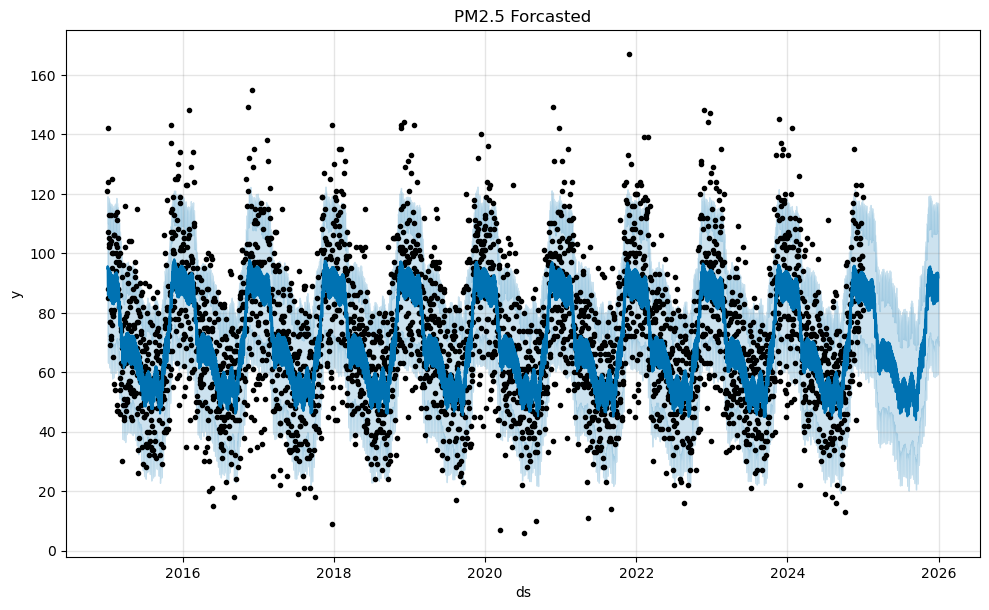

In [81]:
model_pm25.plot(forecast_pm25)
plt.title('PM2.5 Forcasted')
plt.show()

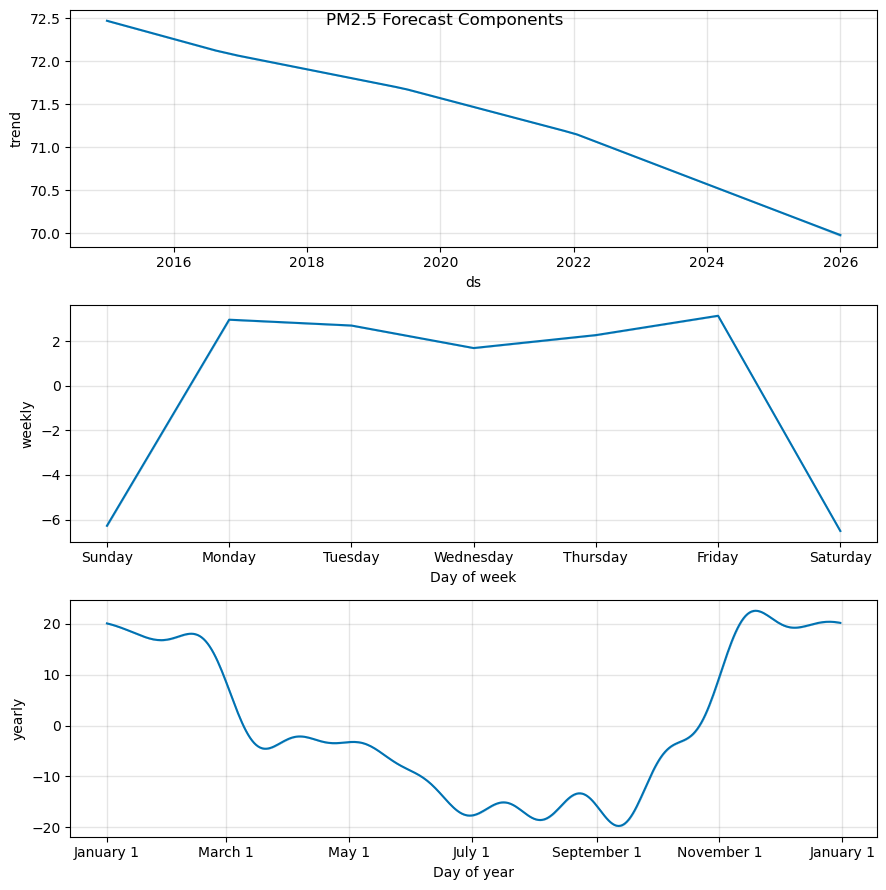

In [85]:
model_pm25.plot_components(forecast_pm25)
plt.suptitle('PM2.5 Forecast Components')
plt.show()

In [86]:
delhi_pm25.describe()

,ds,y
count,3653,3653.000000
mean,2020-01-01 00:00:00,71.495483
min,2015-01-01 00:00:00,6.000000
25%,2017-07-02 00:00:00,55.000000
50%,2020-01-01 00:00:00,69.000000
75%,2022-07-02 00:00:00,87.000000
max,2024-12-31 00:00:00,167.000000
std,NaN,23.426268


In [87]:
forecast_pm25['yhat'].describe()

count    4018.000000
mean       71.368437
std        14.823261
min        43.884594
25%        58.746099
50%        69.880775
75%        85.261112
max        97.971501
Name: yhat, dtype: float64

## Observation

Concentration of PM2.5 have a down trend from 2016 till 2024, it is maximum on weekdays throughout the year, and it is minimum during monsoon(July-Sept)

Similar pattern can be seen with other pollutants.

## Correlation between Weather and AQI

In [88]:
delhi_df.columns

Index(['Date', 'City', 'State', 'AQI', 'AQI_Category', 'PM2.5', 'PM10', 'NO2',
       'SO2', 'CO', 'O3', 'NH3', 'Max_Temperature_C', 'Min_Temperature_C',
       'Avg_Temperature_C', 'Humidity_Percent', 'Rainfall_mm',
       'Wind_Speed_kmh', 'Wind_Direction', 'Atmospheric_Pressure_hPa',
       'Visibility_km', 'Month', 'Season'],
      dtype='object')

In [90]:
delhi_df[['AQI','Max_Temperature_C', 'Min_Temperature_C', 'Avg_Temperature_C', 'Humidity_Percent', 'Rainfall_mm', 'Wind_Speed_kmh', 'Atmospheric_Pressure_hPa', 'Visibility_km']].corr()

,AQI,Max_Temperature_C,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Atmospheric_Pressure_hPa,Visibility_km
AQI,1.000000,-0.569391,-0.564209,-0.568253,-0.320441,-0.121200,0.002782,0.015755,0.462470
Max_Temperature_C,-0.569391,1.000000,0.990432,0.997589,0.365588,0.135153,-0.011371,0.026300,-0.827462
Min_Temperature_C,-0.564209,0.990432,1.000000,0.997615,0.358294,0.130496,-0.011263,0.023715,-0.818852
Avg_Temperature_C,-0.568253,0.997589,0.997615,1.000000,0.362829,0.133183,-0.011305,0.025057,-0.825091
Humidity_Percent,-0.320441,0.365588,0.358294,0.362829,1.000000,0.116002,-0.018968,-0.020955,-0.310939
Rainfall_mm,-0.121200,0.135153,0.130496,0.133183,0.116002,1.000000,-0.019619,0.001860,-0.121669
Wind_Speed_kmh,0.002782,-0.011371,-0.011263,-0.011305,-0.018968,-0.019619,1.000000,0.003814,-0.012100
Atmospheric_Pressure_hPa,0.015755,0.026300,0.023715,0.025057,-0.020955,0.001860,0.003814,1.000000,-0.011582
Visibility_km,0.462470,-0.827462,-0.818852,-0.825091,-0.310939,-0.121669,-0.012100,-0.011582,1.000000


<Axes: >

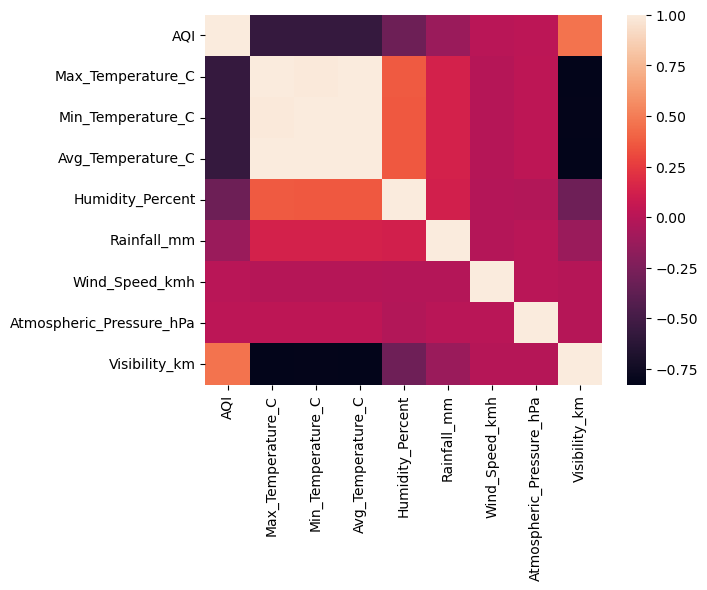

In [91]:
#visualising with heatmap
sns.heatmap(delhi_df[['AQI','Max_Temperature_C', 'Min_Temperature_C', 'Avg_Temperature_C', 'Humidity_Percent', 'Rainfall_mm', 'Wind_Speed_kmh', 'Atmospheric_Pressure_hPa', 'Visibility_km']].corr())

## Observation

AQI is highly affected by temparature, humidity and rainfall, but it is seen that it does not get much affected from atmospheric pressure.